In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display all columns
pd.set_option('display.max_columns', None)


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/india_housing_prices.csv')

# Display basic info
print("📊 Dataset Shape:", df.shape)
print("\n🔍 First 5 Rows:")
df.head()


📊 Dataset Shape: (250000, 23)

🔍 First 5 Rows:


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [3]:
# Check data types and missing values
print("📋 Data Types and Missing Values:")
print(df.info())


📋 Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-nu

In [4]:
# Statistical summary of numerical columns
print("📈 Statistical Summary:")
df.describe()


📈 Statistical Summary:


,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [5]:
# Check missing values
print("❌ Missing Values:")
missing = df.isnull().sum()
missing[missing > 0]


❌ Missing Values:


Series([], dtype: int64)

In [6]:
# Check for duplicate rows
print(f"🔄 Duplicate Rows: {df.duplicated().sum()}")


🔄 Duplicate Rows: 0


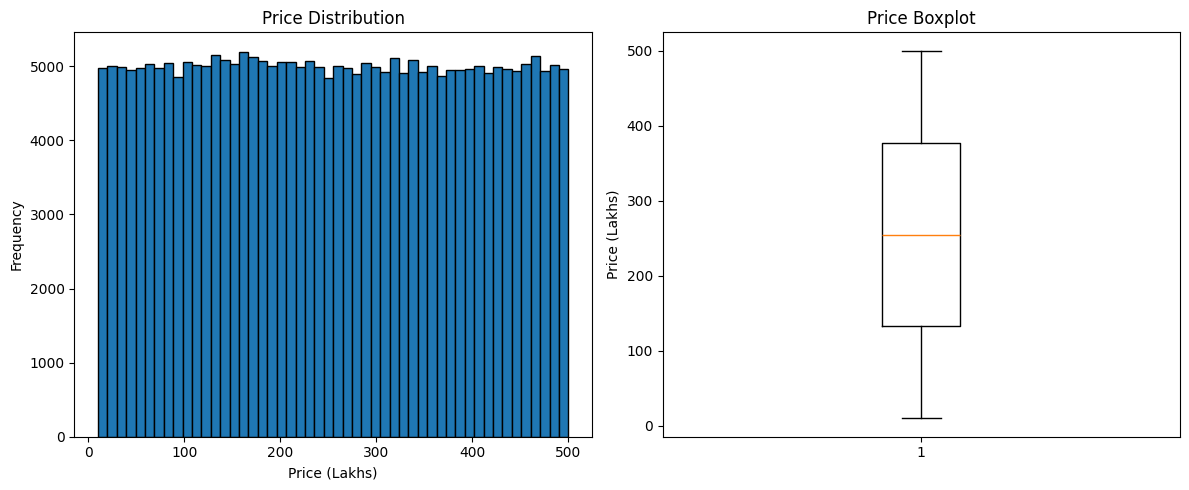

In [7]:
# Plot price distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Price_in_Lakhs'], bins=50, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Price_in_Lakhs'])
plt.title('Price Boxplot')
plt.ylabel('Price (Lakhs)')

plt.tight_layout()
plt.show()


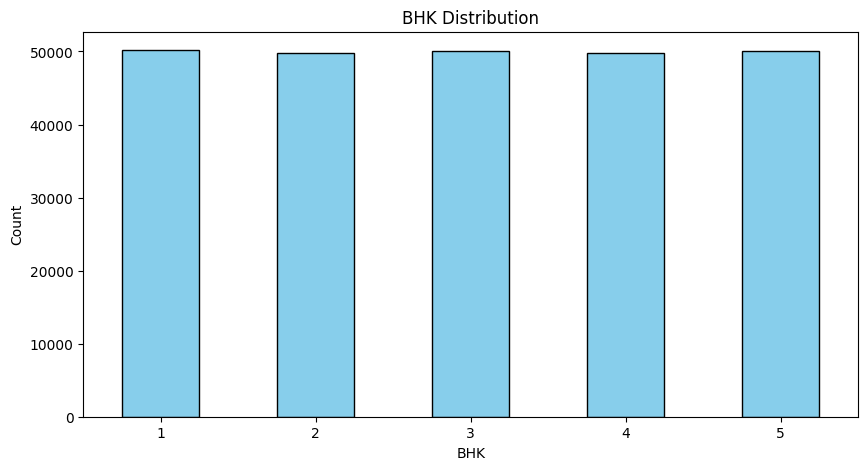

In [8]:
# BHK distribution
plt.figure(figsize=(10, 5))
df['BHK'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('BHK Distribution')
plt.xlabel('BHK')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


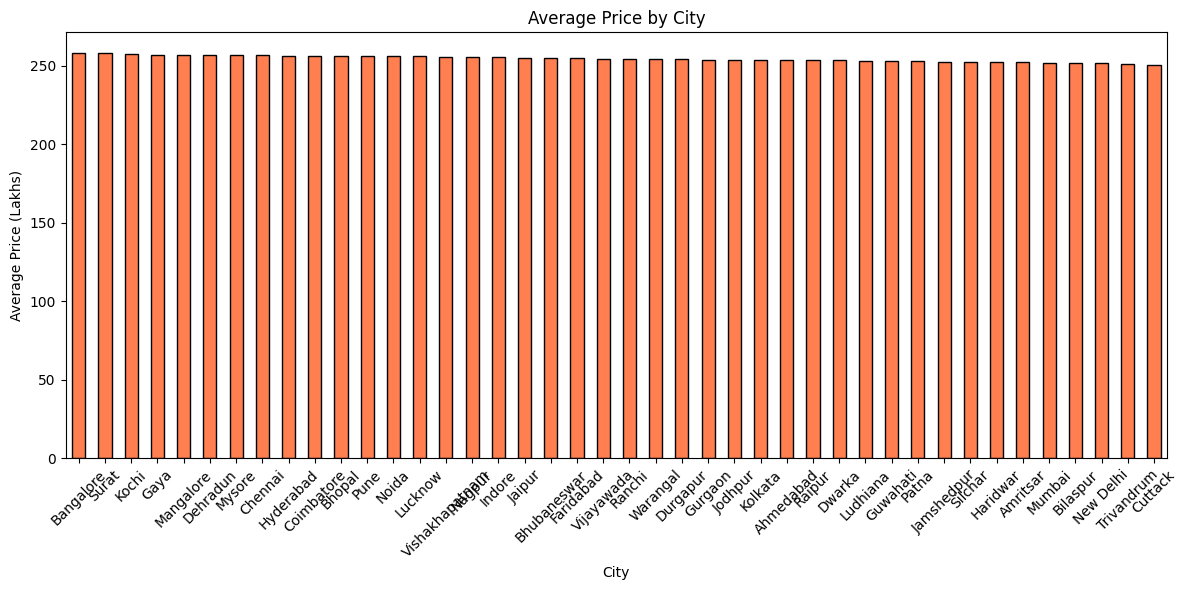

In [9]:
# Average price by city
plt.figure(figsize=(12, 6))
city_avg_price = df.groupby('City')['Price_in_Lakhs'].mean().sort_values(ascending=False)
city_avg_price.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel('Average Price (Lakhs)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


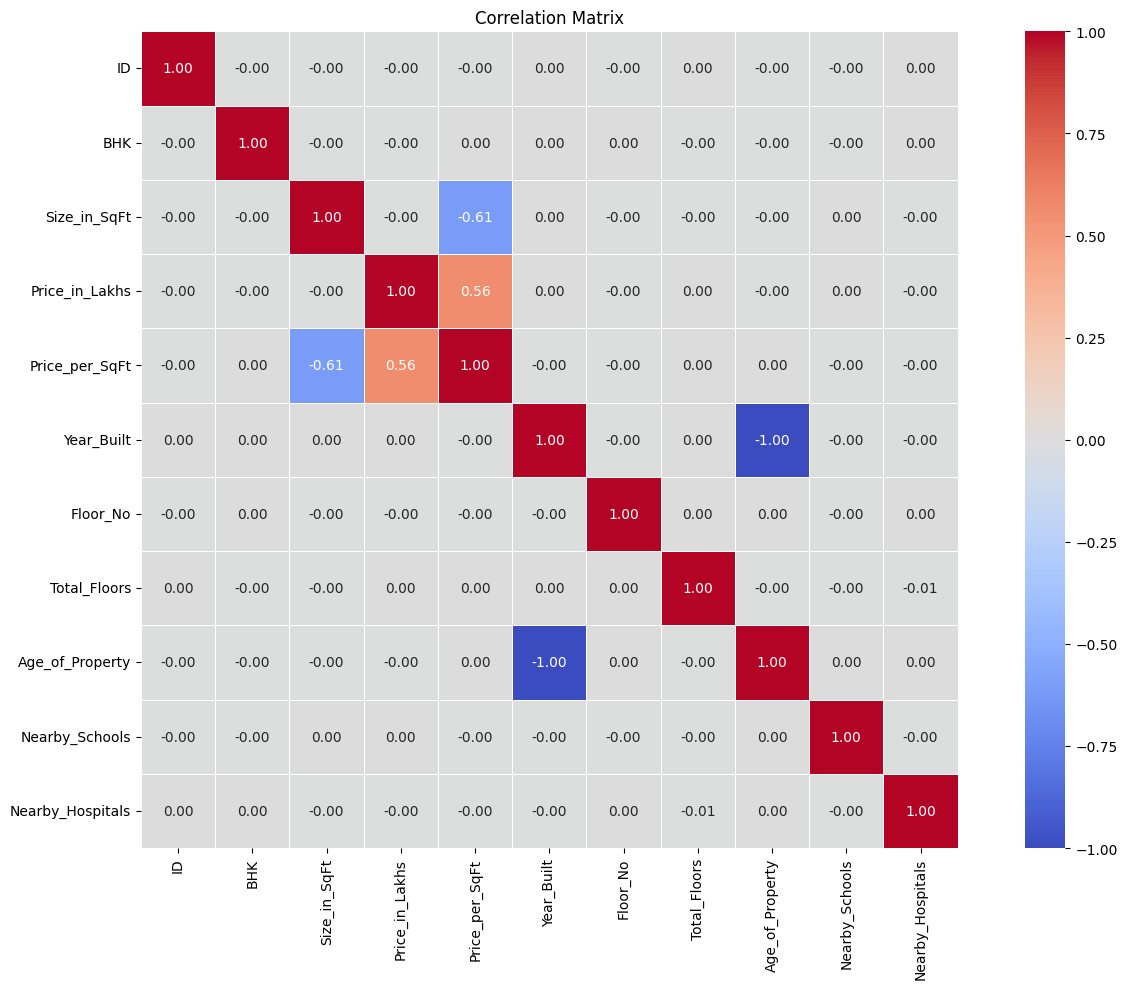

In [10]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


In [11]:
# Save key insights
insights = {
    'Total Records': df.shape[0],
    'Total Features': df.shape[1],
    'Missing Values': df.isnull().sum().sum(),
    'Duplicate Rows': df.duplicated().sum(),
    'Average Price': df['Price_in_Lakhs'].mean(),
    'Price Range': f"{df['Price_in_Lakhs'].min()} - {df['Price_in_Lakhs'].max()}"
}

for key, value in insights.items():
    print(f"{key}: {value}")


Total Records: 250000
Total Features: 23
Missing Values: 0
Duplicate Rows: 0
Average Price: 254.58685403999996
Price Range: 10.0 - 500.0
